In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 06:23:45,126] A new study created in memory with name: no-name-fc128e4c-e12e-4670-a465-e2cfcb1944f1
[I 2025-04-27 06:29:05,289] Trial 0 finished with value: 0.9623101265822784 and parameters: {'n_estimators': 3684, 'learning_rate': 0.0011358072226294598, 'num_leaves': 90, 'max_depth': 5, 'min_child_samples': 21, 'subsample': 0.8227925179417945, 'colsample_bytree': 0.5229451189992435, 'reg_alpha': 8.711643689010807e-07, 'reg_lambda': 9.07452111312055e-06}. Best is trial 0 with value: 0.9623101265822784.
[I 2025-04-27 06:31:23,082] Trial 1 finished with value: 0.9723734177215191 and parameters: {'n_estimators': 7615, 'learning_rate': 0.020169160066490822, 'num_leaves': 28, 'max_depth': 8, 'min_child_samples': 79, 'subsample': 0.5642200224758368, 'colsample_bytree': 0.9168469235658349, 'reg_alpha': 1.032247527425411e-05, 'reg_lambda': 1.783076192661506e-07}. Best is trial 1 with value: 0.9723734177215191.
[I 2025-04-27 06:32:50,181] Trial 2 finished with value: 0.95727848101

Best trial:
Accuracy: 0.9774367088607596
Best hyperparameters:  {'n_estimators': 6811, 'learning_rate': 0.0055377887505738835, 'num_leaves': 69, 'max_depth': 8, 'min_child_samples': 79, 'subsample': 0.517887161877116, 'colsample_bytree': 0.5341098206883351, 'reg_alpha': 0.0017660288826535455, 'reg_lambda': 0.0006859994582996513}


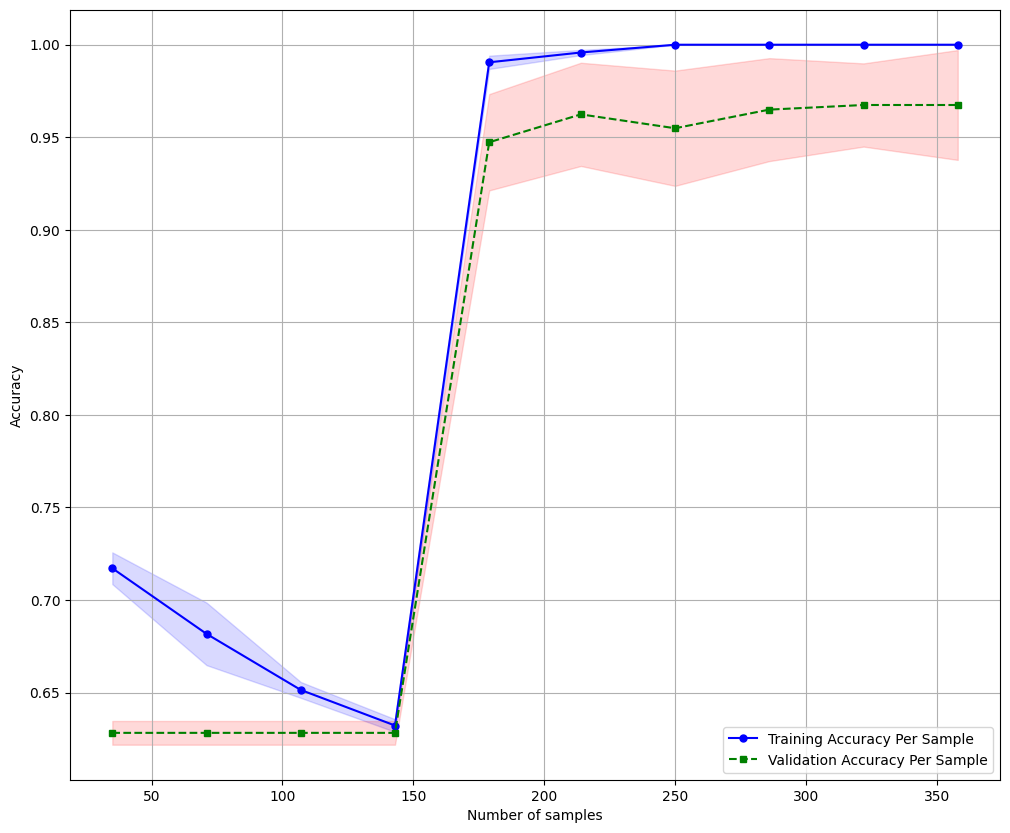

Confusion Matrix
[[ 57   7]
 [  0 107]]
Accuracy: 0.9591, Precision: 0.9386, Recall: 1.0000, F1: 0.9683, AUC: 0.9943


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

helper.train_and_evaluate_model('lgbm', X_train_scaled, X_test_scaled, y_train, y_test)

---
# Raw Data
---

[I 2025-04-27 10:16:11,762] A new study created in memory with name: no-name-58c37863-7af7-4ea4-9042-d5fe4564d0f6
[I 2025-04-27 10:17:48,105] Trial 0 finished with value: 0.9522784810126582 and parameters: {'n_estimators': 8678, 'learning_rate': 0.18877377232869938, 'num_leaves': 57, 'max_depth': 9, 'min_child_samples': 40, 'subsample': 0.8208206329991321, 'colsample_bytree': 0.9425279270752828, 'reg_alpha': 4.5919532894482155e-05, 'reg_lambda': 3.1704725040281723}. Best is trial 0 with value: 0.9522784810126582.
[I 2025-04-27 10:18:04,485] Trial 1 finished with value: 0.9647468354430379 and parameters: {'n_estimators': 2596, 'learning_rate': 0.008439814051866544, 'num_leaves': 12, 'max_depth': 3, 'min_child_samples': 84, 'subsample': 0.9769585412316553, 'colsample_bytree': 0.45461203563301333, 'reg_alpha': 8.30687271336733e-06, 'reg_lambda': 1.1463066665375027e-06}. Best is trial 1 with value: 0.9647468354430379.
[I 2025-04-27 10:18:08,699] Trial 2 finished with value: 0.9573417721518

Best trial:
Accuracy: 0.9774367088607594
Best hyperparameters:  {'n_estimators': 1186, 'learning_rate': 0.14003049418105645, 'num_leaves': 98, 'max_depth': 6, 'min_child_samples': 79, 'subsample': 0.8187519717316771, 'colsample_bytree': 0.43105670968159815, 'reg_alpha': 6.457122048142185e-05, 'reg_lambda': 3.3153377000870113e-06}


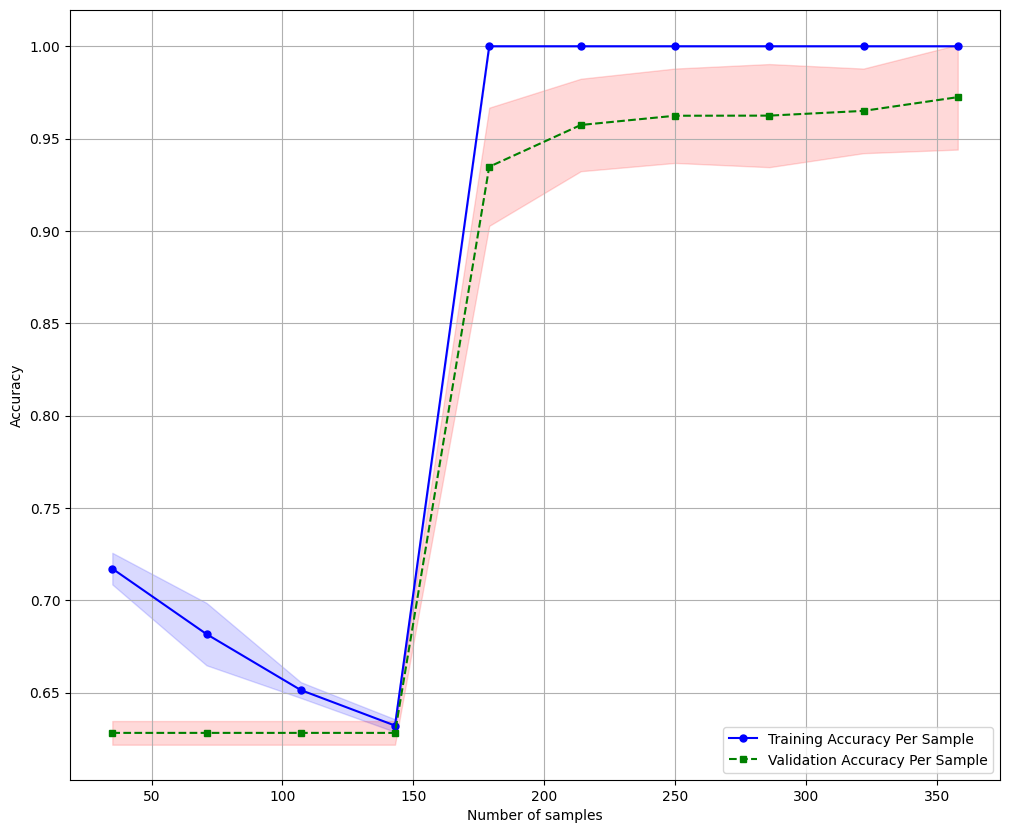

Confusion Matrix
[[ 59   5]
 [  2 105]]
Accuracy: 0.9591, Precision: 0.9545, Recall: 0.9813, F1: 0.9677, AUC: 0.9934


In [ ]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
helper.train_and_evaluate_model('lgbm', X_train, X_test, y_train, y_test)